# Hamed Torabi

This kernel will provide a analysis through the Titanic Disaster to understand the Survivors patterns.

Notebook, structured with steps:

1.Data description  
2.Data visualization  
3.Data Cleaning  
4.Handling Text and Categorical Attributes  
5.Create a test Set with stratified sampling  
6.Transformation Pipelines  
7.Select and Train the Model  
8.Predictions and Evaluations include confusion matrix  
9.Choosing the best K Value

# 1.Data Description

RMS Titanic was a British passenger and mail carrying ocean liner, operated by the White Star Line, that sank in the North Atlantic Ocean on 15 April 1912 as a result of striking an iceberg during her maiden voyage from Southampton, England, to New York City, United States. Of the estimated 2,224 passengers and crew aboard, about 1,500 died, making it the deadliest sinking of a single ship up to that time.

I created this Notebook to provide a optimal model about chance of survived.


# 2.Data Visualization

## Import Libraries

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import matplotlib as mpl

## Get The Data

In [2]:
df = pd.read_csv("titanic_train.csv",index_col=0)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [4]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Different features have special affect the live dependency of passengers. for example age, sex and embarked

<Axes: xlabel='Sex', ylabel='count'>

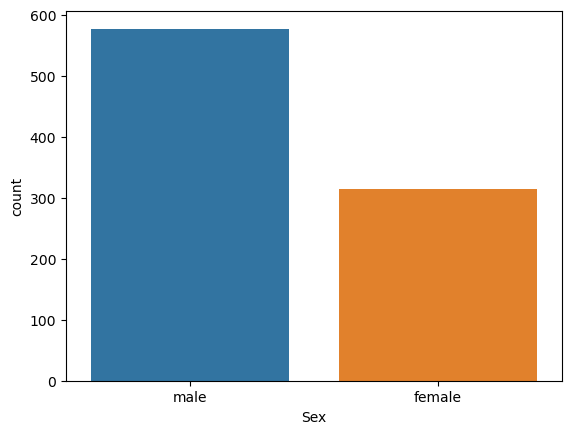

In [5]:
sns.countplot(df, x='Sex')

According to this countplot, mans are more than womans. 

<Axes: xlabel='Sex', ylabel='Survived'>

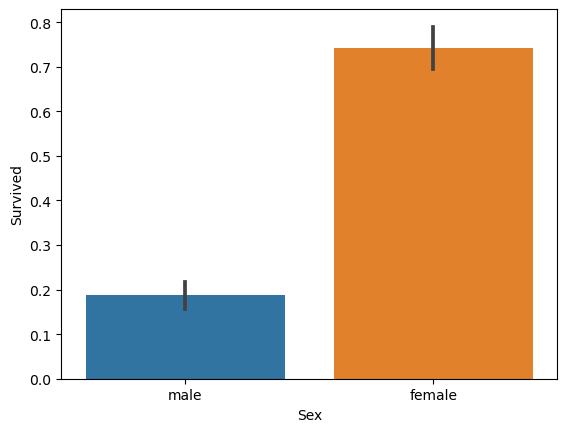

In [5]:
sns.barplot(x='Sex',y='Survived',data=df)

womans are survived significant and this statics show: sex is important factor

Thats Histogram show the Age distribution passengers.

<Axes: xlabel='Sex', ylabel='count'>

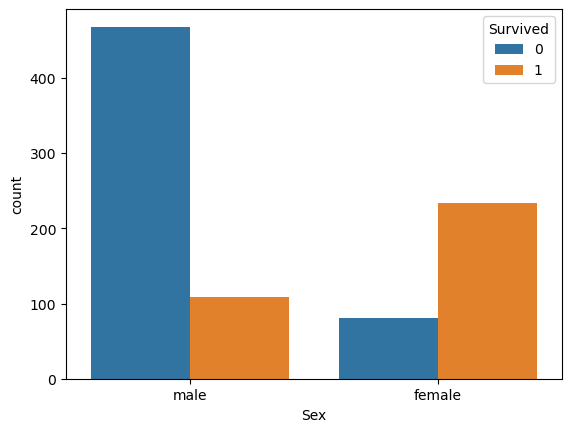

In [4]:
sns.countplot(df,x='Sex',hue='Survived')

This countplot is better schema to accept that theory.

D:\python setup j\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


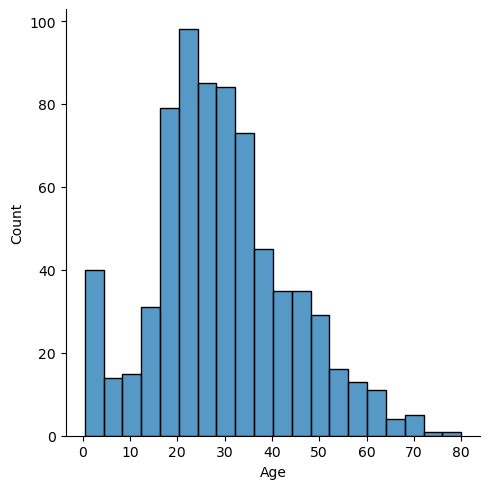

In [6]:
sns.displot(df['Age'], kind='hist')

This countplot accept the theory about: sex is important factor to survive.

The result of this countplot is: mans had less chance to survive.

D:\python setup j\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


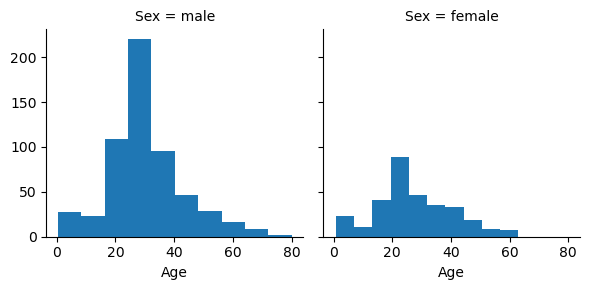

In [95]:
g = sns.FacetGrid(data=df , col='Sex')
g.map(plt.hist , 'Age')

D:\python setup j\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


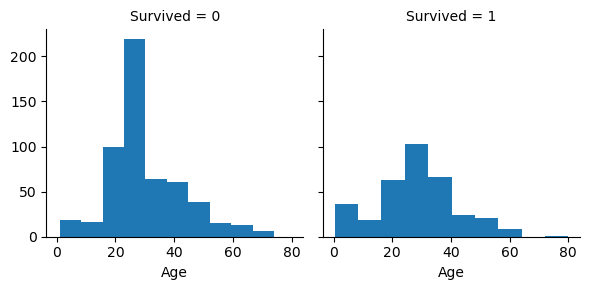

In [96]:
g = sns.FacetGrid(data=df , col='Survived')
g.map(plt.hist , 'Age')

Text(0.5, 1.0, 'titanic.corr()')

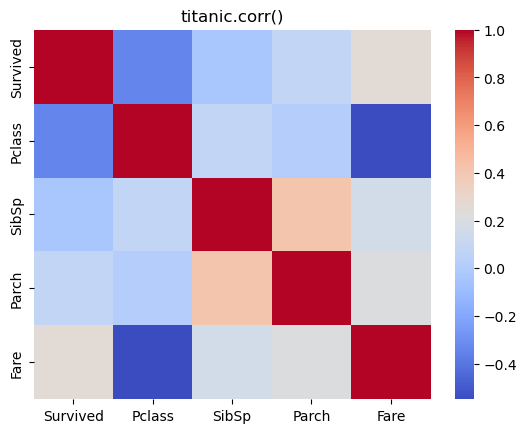

In [99]:
selected_column = ["Survived" , "Pclass" , "SibSp" , "Parch" , "Fare"]
result_data = df[selected_column]
sns.heatmap(result_data.corr() , cmap='coolwarm')
plt.title('titanic.corr()')

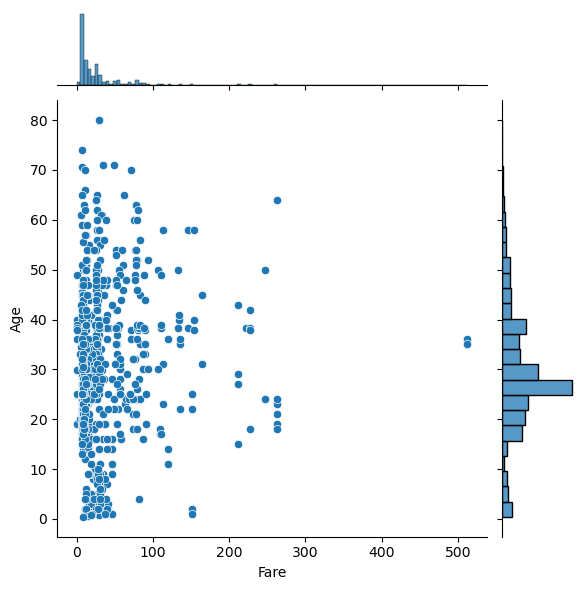

In [101]:
sns.jointplot(x='Fare' , y='Age' , data=df)

This jointplot show the less important feature: Fare
In age of bigger than 60 ---> passengers have less Fare but this factor is not significant because In other ages passengers that survived, necessarily not have big Fare.

# 3.Data Cleaning

In [3]:
new_df=df.drop(['Name' ,'Ticket','Cabin'], axis=1)
new_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


features: Name , Ticket , Cabin , PassengerId
    is useless factor in our machine learning model

In [4]:
new_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [5]:
new_df=new_df.dropna(subset=['Embarked'])
new_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,NaN,1,2,23.4500,S


In [22]:
mean_age = new_df['Age'].mean()
mean_age

29.642092696629216

age is continous and have 177 null value, So remove the rows are not good idea.
our strategy to fill null value is mean.

In [23]:
new_df.groupby('Survived')['Age'].mean()

Survived
0    30.402116
1    28.414879
Name: Age, dtype: float64

We can see the passenger was died and not died have not too many difference value. So mean is good strategy to fill null values of ages.

In [29]:
new_df["Age"].fillna(mean_age, inplace=True)
new_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# 4.Handling Text and Categorical Attributes

In [30]:
s = sorted(new_df['Sex'].unique())
z=zip(s, range(0, len(s) + 1))
gm = dict(z)
new_df['Sex'].head(5)
new_df['Sex'] = new_df['Sex'].map(gm).astype(int)
new_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.000000,1,0,7.2500,2
2,1,1,0,38.000000,1,0,71.2833,0
3,1,3,0,26.000000,0,0,7.9250,2
4,1,1,0,35.000000,1,0,53.1000,2
5,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
887,0,2,1,27.000000,0,0,13.0000,2
888,1,1,0,19.000000,0,0,30.0000,2
889,0,3,0,29.642093,1,2,23.4500,2


0=male and 1=female

In [31]:
p = sorted(new_df['Embarked'].unique())
m=zip(p, range(0, len(p) + 1))
tm = dict(m)
new_df['Embarked'].head(5)
new_df['Embarked'] = new_df['Embarked'].map(tm).astype(int)
new_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.000000,1,0,7.2500,2
2,1,1,0,38.000000,1,0,71.2833,0
3,1,3,0,26.000000,0,0,7.9250,2
4,1,1,0,35.000000,1,0,53.1000,2
5,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
887,0,2,1,27.000000,0,0,13.0000,2
888,1,1,0,19.000000,0,0,30.0000,2
889,0,3,0,29.642093,1,2,23.4500,2


S=2 , C=0 , Q=1

# 5.Create a test Set with stratified sampling

In [34]:
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test,y_train,y_test= X_train, X_test, y_train, y_test = train_test_split(new_df.drop('Survived',axis=1),new_df['Survived'],test_size=0.3,random_state=42)

# 6.Transformation Pipelines

In [41]:
from sklearn.preprocessing import LabelEncoder , StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.fit_transform(X_train) , columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test) , columns = X_test.columns)
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,-1.586317,-1.390670,0.389755,0.420921,-0.484112,1.124776,0.585758
1,0.814387,-1.390670,-0.440006,-0.488152,-0.484112,-0.468406,0.585758
2,0.814387,0.719078,-0.666304,-0.488152,-0.484112,-0.486566,0.585758
3,-0.385965,0.719078,0.465188,0.420921,1.934506,-0.097351,0.585758
4,-0.385965,0.719078,-0.062842,0.420921,-0.484112,-0.097924,-1.944391


# 7.Select and Train the Model

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn = KNeighborsClassifier(n_neighbors=1)

In [45]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [48]:
knn.score(X_train, y_train)

0.9887459807073955

In [49]:
y_pred= knn.predict(X_test)
pd.DataFrame({'Y_Test':y_test, 'Y_Pred': y_pred})

,Y_Test,Y_Pred
PassengerId,,
282,0,0
436,1,1
40,1,1
419,0,0
586,1,1
...,...,...
455,0,0
633,1,0
694,0,0


In [50]:
knn.score(X_test, y_test)

0.7565543071161048

# 8.Predictions and Evaluations include confusion matrix

In [51]:
from sklearn.metrics import classification_report,confusion_matrix

In [52]:
confusion_matrix(y_test, y_pred)

array([[132,  35],
       [ 30,  70]], dtype=int64)

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       167
           1       0.67      0.70      0.68       100

    accuracy                           0.76       267
   macro avg       0.74      0.75      0.74       267
weighted avg       0.76      0.76      0.76       267



<Axes: >

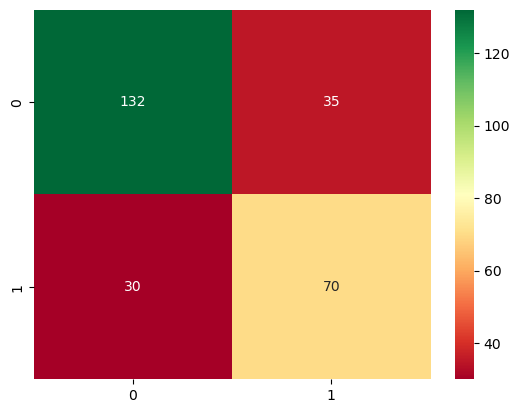

In [92]:
sns.heatmap(confusion_matrix(y_test,y_pred),cmap='RdYlGn',annot=True,fmt='2.0f')

# 9.Choosing the best K Value

In [67]:
error_rate = []

# Will take some time
for i in range(1,35):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

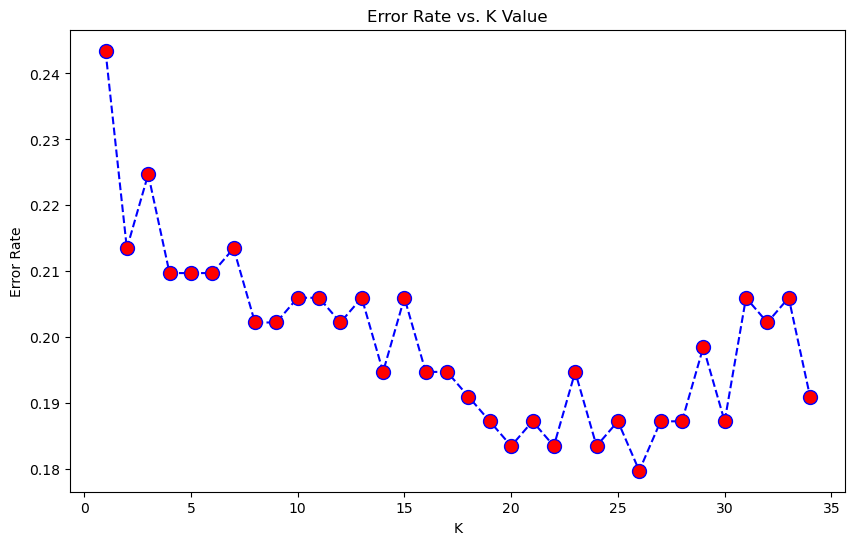

In [68]:
plt.figure(figsize=(10,6))
plt.plot(range(1,35),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [82]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[132  35]
 [ 30  70]]


              precision    recall  f1-score   support

           0       0.81      0.79      0.80       167
           1       0.67      0.70      0.68       100

    accuracy                           0.76       267
   macro avg       0.74      0.75      0.74       267
weighted avg       0.76      0.76      0.76       267



In [84]:
knn.score(X_test, y_test)

0.7565543071161048

<Axes: >

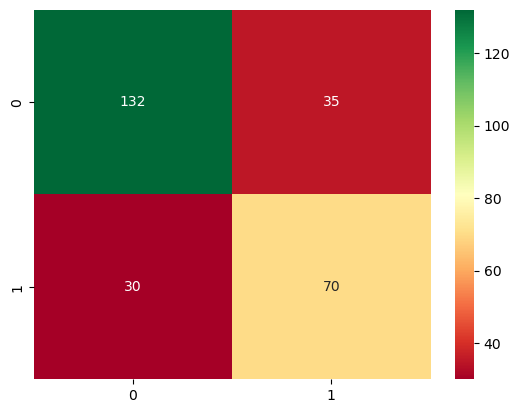

In [83]:
sns.heatmap(confusion_matrix(y_test,pred),cmap='RdYlGn',annot=True,fmt='2.0f')

In [86]:
# NOW WITH K=27
knn = KNeighborsClassifier(n_neighbors=27)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=27')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=27


[[151  16]
 [ 34  66]]


              precision    recall  f1-score   support

           0       0.82      0.90      0.86       167
           1       0.80      0.66      0.73       100

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.81       267



In [87]:
knn.score(X_test, y_test)

0.8127340823970037

<Axes: >

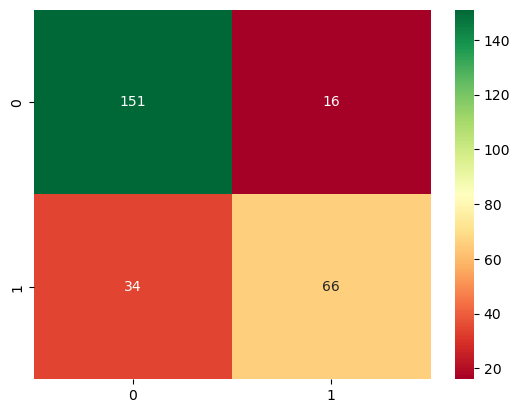

In [88]:
sns.heatmap(confusion_matrix(y_test,pred),cmap='RdYlGn',annot=True,fmt='2.0f')

In [89]:
# NOW WITH K=26
knn = KNeighborsClassifier(n_neighbors=26)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=26')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=26


[[154  13]
 [ 35  65]]


              precision    recall  f1-score   support

           0       0.81      0.92      0.87       167
           1       0.83      0.65      0.73       100

    accuracy                           0.82       267
   macro avg       0.82      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



In [90]:
knn.score(X_test, y_test)

0.8202247191011236

<Axes: >

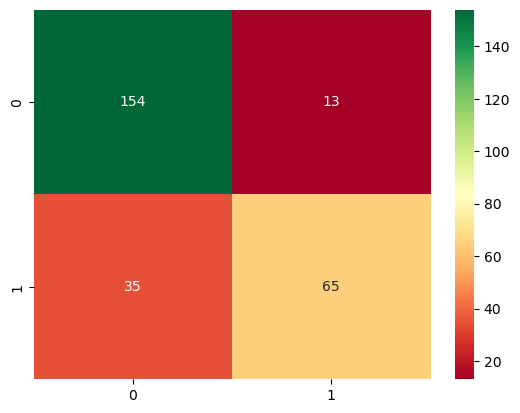

In [91]:
sns.heatmap(confusion_matrix(y_test,pred),cmap='RdYlGn',annot=True,fmt='2.0f')

Due to the confusion matrix we have 2 choice : 26 and 27


In 26: we have 13 FP and 35 FN

In 27: we have 16 FP and 34 FN


So the best choice is According to what we needed


But 26 have better performance than 27 because the KNN score 26 is 0.8202247191011236 and the KNN score 27 is 0.8127340823970037